In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1
#### Generate N pairs of uniform random numbers (x,y), where x~ U(0,1) and y ~ U(0,1), and each (x,y) pair represents a point in the unit square. To obtain an estimate of π, count the fraction of points that fall inside the unit quarter circle and multiply by 4. Note that the fraction of points that fall inside the quarter circle should tend to the ratio between the area of the unit quarter circle (i.e., ¼ π) as compared to area of the unit square (i.e., 1). We proceed step-by-step:

## Part A
#### Create a function insidecircle that takes two inputs between 0 and 1 and returns 1 if these points fall within the unit circle.

In [3]:
def insidecircle(x, y):
    return x**2 + y**2 <= 1

## Part B
#### Create a function estimatepi that takes a single input N, generates N pairs of uniform random numbers and uses insidecircle to produce an estimate of π as described above. In addition to the estimate of π, estimatepi should also return the standard error of this estimate, and a 95% confidence interval for the estimate. 

In [8]:
def estimatepi(N):
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)
    df = pd.DataFrame({'x': x, 'y': y})
    df['inside'] = df.apply(lambda row: insidecircle(row['x'], row['y']), axis=1)
    mean = df['inside'].mean()
    se = df['inside'].std() / np.sqrt(N)
    pi_est = 4 * mean
    pi_est_se = 4 * se
    upper_95 = pi_est + 1.96 * pi_est_se
    lower_95 = pi_est - 1.96 * pi_est_se
    return pi_est, pi_est_se, upper_95, lower_95


## Part C
#### Use estimatepi to estimate π for N = 1000 to 10000 in increments of 500 and record the estimate, its standard error and the upper and lower bounds of the 95% CI. How large must N be in order to ensure that your estimate of π is within 0.1 of the true value?

In [9]:
results = pd.DataFrame()

for n in range(1000, 10001, 500):
    pi_est, pi_est_se, upper_95, lower_95 = estimatepi(n)
    results = results.append({'N': n, 'estimate': pi_est, 'se': pi_est_se,
                              'upper': upper_95, 'lower': lower_95,
                              'CI_estimate_gap': upper_95 - lower_95}, 
                             ignore_index=True)

results

,CI_estimate_gap,N,estimate,lower,se,upper
0,0.203806,1000.0,3.140000,3.038097,0.051991,3.241903
1,0.169383,1500.0,3.096000,3.011308,0.043210,3.180692
2,0.143955,2000.0,3.142000,3.070023,0.036723,3.213977
3,0.128729,2500.0,3.142400,3.078036,0.032839,3.206764
4,0.116690,3000.0,3.158667,3.100322,0.029768,3.217012
5,0.108874,3500.0,3.140571,3.086135,0.027774,3.195008
6,0.100099,4000.0,3.180000,3.129950,0.025536,3.230050
7,0.093934,4500.0,3.190222,3.143255,0.023963,3.237189
8,0.091170,5000.0,3.138400,3.092815,0.023258,3.183985
9,0.085960,5500.0,3.164364,3.121384,0.021929,3.207344


Looking at the above table, the minimum value of N that fulfils the estimate of pi within 0.1 of the true value is 1500. The estimate at N=2000 is 3.142, which is within a 0.1 range of true pi value 3.14159. Additionally, at N=2000 it satisfies the criteria that the confidence interval gap is wtihin 0.1 above and below the true value of pi.

## Part D
#### Using the value of N you determined in part c), run estimatepi 500 times and collect 500 different estimates of π. Produce a histogram of the estimates and note the shape of this distribution.

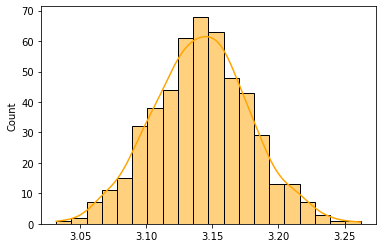

In [29]:
pi_estimates = [estimatepi(2000)[0] for _ in range(500)]
sns.histplot(pi_estimates, kde=True, color='orange')
plt.show()

#### Calculate the standard deviation of the estimates – does it match the standard error you obtained in part c)?

In [17]:
Est_sd = np.std(pi_estimates)
print("Standard Deviation of Estimates:", Est_sd)

Standard Deviation of Estimates: 0.03752732636359807


The standard error for the single run in part C was 0.036723, while the output from 500 estimates was 0.037527. This is a very small absolute value difference of 0.000804

#### What percentage of the estimates lies within the 95% CI you obtained in part c)?

In [18]:
ci2000 = results[results['N'] == 2000]
within_ci = sum((np.array(pi_estimates) > ci2000['lower'].values[0]) & 
                (np.array(pi_estimates) < ci2000['upper'].values[0])) / len(pi_estimates)
print("Percentage within 95% CI for N=2000:", within_ci * 100, "%")

Percentage within 95% CI for N=2000: 93.0 %


# Question 2
#### A salesperson in a large bicycle shop is paid a bonus if he sells more than 4 bicycles a day.  The probability of selling more than 4 bicycles a day is only 0.40.  If the number of bicycles sold is greater than 4, the distribution of sales as shown below.  The shop has four different models of bicycles.  The amount of the bonus paid out varies by type.  The bonus for model A is $10; 40% of the bicycles sold are of this type.  Model B accounts for 35% of the sales and pays a bonus of $15.  Model C has a bonus rating of $20 and makes up 20% of the sales.  Finally, a model D pays a bonus of $25 for each sale but accounts for only 5% of the sales.  Develop a simulation model to calculate the bonus a salesperson can expect in a day.

In [24]:
def simulate_daily_bonus():
    if np.random.random() > 0.40:
        return 0  
    bicycles_sold = np.random.choice([5, 6, 7, 8], p=[0.35, 0.45, 0.15, 0.05])
    
    bonus_mapping = {'A': 10, 'B': 15, 'C': 20, 'D': 25}
    
    model_probabilities = [0.40, 0.35, 0.20, 0.05]
    models = ['A', 'B', 'C', 'D']

    total_bonus = sum(bonus_mapping[np.random.choice(models, p=model_probabilities)] for _ in range(bicycles_sold))

    return total_bonus

num_days = 10000 #Nothing like 25+ years of simulated days 
average_bonus = sum(simulate_daily_bonus() for _ in range(num_days)) / num_days
print(f"Expected daily bonus: ${average_bonus:.2f}")

Expected daily bonus: $33.82


This model does not accurately simnulate the sale of bicycles in a given day since it is based on checking whether 4 bicycles are sold. Can result in overestimations it seems

In [25]:
np.random.seed(4901) #for reproducibility 

prob_bicycles = [1 - 0.40, 0.4 * 0.35, 0.4 * 0.45, 0.4 * 0.15, 0.4 * 0.05]

bicycles_sold = np.random.choice([0, 5, 6, 7, 8], size=10000, p=prob_bicycles)

bonus_values = [10, 15, 20, 25]
model_probabilities = [0.4, 0.35, 0.2, 0.05]

total_bonus = 0

for bicycles in bicycles_sold:
    if bicycles > 0:
        daily_bonus = np.random.choice(bonus_values, size=bicycles, p=model_probabilities)
        total_bonus += daily_bonus.sum()

expected_bonus = total_bonus / 10000
print(f"Expected daily bonus: ${expected_bonus:.2f}")


Expected daily bonus: $33.40


# Question 3
#### Michael is 24 years old and has a 401(k) plan through his employer, a large financial institution.  His company matches 50% of his contributions up to 6% of his salary.  He currently contributes the maximum amount he can (i.e., 6%).  In his 401(k), he has three funds.  Investment A is a large-cap index fund, which has had an average annual growth over the past 10 years of 6.63% with a standard deviation of 13.46%.  Investment B is a mid-cap index fund with a 10-year average annual growth of 9.89% and a standard deviation of 15.28%.  Finally, Investment C is a small-cap Index fund with a 10-year average annual growth rate of 8.55% and a standard deviation of 16.90%.  Fifty percent of his contribution is directed to Investment A, 25% to Investment B, and 25% to Investment C.  His current salary is $48,000 and based on a compensation survey of financial institutions, he expects an average raise of 2.7% with a standard deviation of 0.4% each year.  Develop a simulation model to predict his 401(k) balance at age 60.

In [28]:
np.random.seed(405) #reproducibility 

# Michael conditions
age_now = 24
age_retire = 60
salary = 48000

# Problem Params
contribution_rate = 0.06  # 6%
match_rate = 0.50  # Company matches 50%
raise_avg = 2.7  # Average raise %
raise_std = 0.4  # Standard deviation of raise

investments = {
    'LargeCap': (50, 6.63, 13.46),
    'MidCap': (25, 9.89, 15.28),
    'SmallCap': (25, 8.55, 16.90)
}

#Simulation
balance = 0
for year in range(age_now, age_retire):
    # Salary increase
    raise_percent = np.random.normal(raise_avg, raise_std) / 100
    salary *= (1 + raise_percent)

    # Total annual contribution
    personal_contribution = salary * contribution_rate
    company_contribution = personal_contribution * match_rate
    total_contribution = personal_contribution + company_contribution

    #Inv growth
    for invest_share, growth_mean, growth_std in investments.values():
        growth_rate = np.random.normal(growth_mean, growth_std) / 100
        invest_amount = total_contribution * (invest_share / 100)
        balance += invest_amount * (1 + growth_rate)

print(f"Michael's projected 401(k) balance at age 60: ${balance:,.2f}")


Michael's projected 401(k) balance at age 60: $280,603.08
